## Deep Learning-3, Programming exercise.
#### Done by :
#### Aysha Athar Siddiqui
#### Andrzej Reinke
#### Chan Chun Peng
#### Ramaswamy Venkatachalam
#### Yash Goel

The surface plot is : 


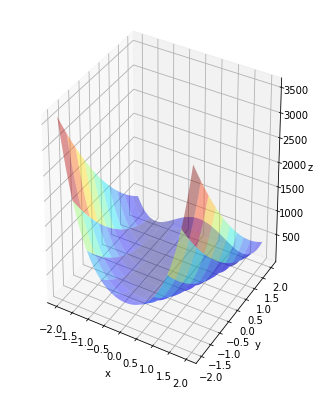

Path taken to reach a local minimum when optimized with SGD without momentum


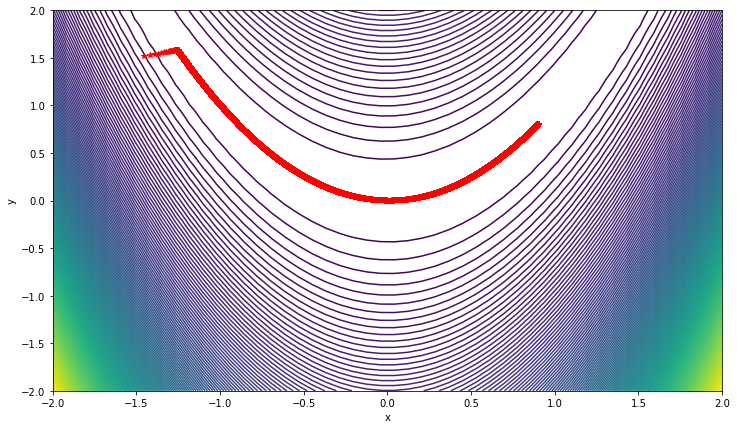

For step :  0
Loss is :  tensor(62.5000, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  4000
Loss is :  tensor(3.9035, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  8000
Loss is :  tensor(2.4212, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  12000
Loss is :  tensor(0.6869, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  16000
Loss is :  tensor(0.2434, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  20000
Loss is :  tensor(0.1238, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  24000
Loss is :  tensor(0.0717, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  28000
Loss is :  tensor(0.0443, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable

def rosenbrock(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

print("The surface plot is : ")
fig = plt.figure(figsize=(12, 7))
X = np.linspace(-2,2)  
Y = np.linspace(-2,2)  
X, Y = np.meshgrid(X, Y)
Z = rosenbrock([X,Y])

#Visualising the surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#Implementinh the function optimise
def optimise(x,optimizer,lr):
    plt.figure(figsize=(12, 7))
    plt.contour(X,Y,Z,200)
    plt.xlabel('x')
    plt.ylabel('y')
    losslist=[]
    steplist=[]
    xval=[]
    step=0
    while(rosenbrock(x)>=lr):
        loss=rosenbrock(x)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losslist.append(loss)
        steplist.append(step)
        xval.append(x)
        plt.plot([x[0]],[x[1]],marker='*', color ='r')
        step+=1
    plt.show()
    return losslist,steplist,xval

x = torch.tensor([-1.5,1.5], requires_grad=True)

#Visualising path without momentum using PyTorch SGD class
optimizer = torch.optim.SGD([x],lr=0.0001)
print("Path taken to reach a local minimum when optimized with SGD without momentum")
losslist,steplist,xval=optimise(x,optimizer,0.01)

#Printing values after every 4000 iterations
for i in steplist:
    if i%4000==0:
        print("For step : ",steplist[i])
        print("Loss is : ",losslist[i])
        print("Value of x is : ",xval[i])

With momentum, alpha=0.1


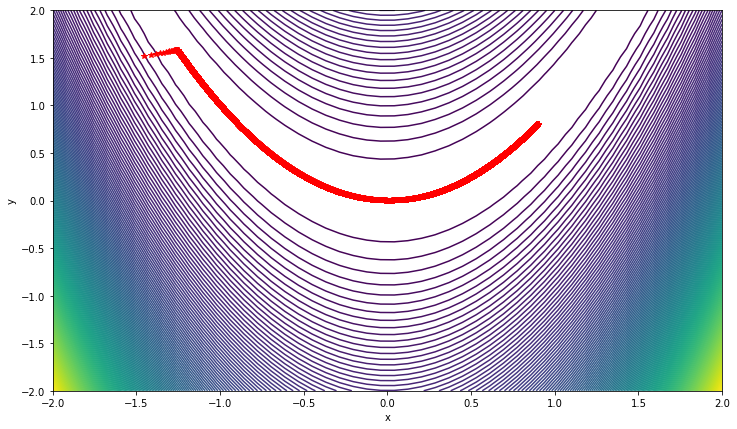

For step :  0
Loss is :  tensor(62.5000, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  4000
Loss is :  tensor(3.7569, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  8000
Loss is :  tensor(2.0177, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  12000
Loss is :  tensor(0.4507, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  16000
Loss is :  tensor(0.1760, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  20000
Loss is :  tensor(0.0904, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  24000
Loss is :  tensor(0.0517, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  28000
Loss is :  tensor(0.0314, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.

In [3]:
#For alpha=0.1 (With momentum)
x = torch.tensor([-1.5,1.5], requires_grad=True)
print("With momentum, alpha=0.1")
optimizer1 = torch.optim.SGD([x],lr=0.0001,momentum=0.1)
losslist,steplist,xval=optimise(x,optimizer1,0.01)
for i in steplist:
    if i%4000==0:
        print("For step : ",steplist[i])
        print("Loss is : ",losslist[i])
        print("Value of x is : ",xval[i])

With momentum, alpha=0.5


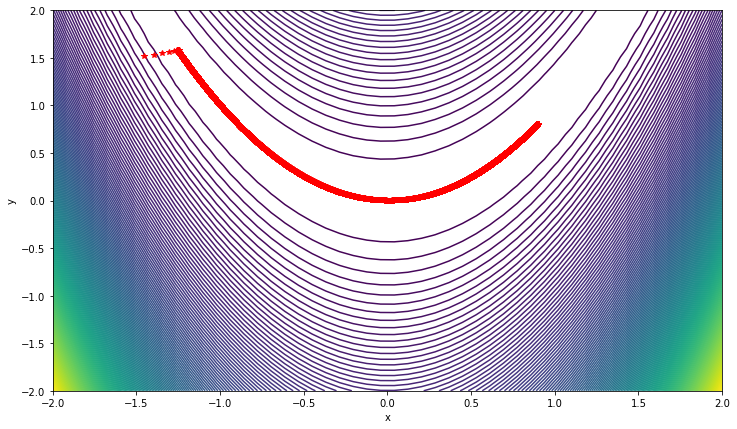

In [ ]:
#For alpha=0.5 (With momentum)
x0=[-1.5,1.5]
x = torch.tensor(x0, requires_grad=True)
print("With momentum, alpha=0.5")
optimizer2 = torch.optim.SGD([x],lr=0.0001,momentum=0.5)
losslist,steplist,xval=optimise(x,optimizer2,0.01)
for i in steplist:
    if i%2000==0:
        print("For step : ",steplist[i])
        print("Loss is : ",losslist[i])
        print("Value of x is : ",xval[i])


With momentum, alpha=0.9


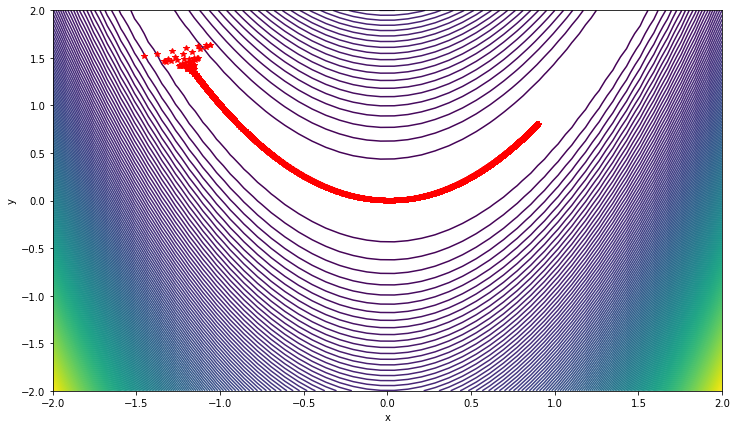

For step :  0
Loss is :  tensor(62.5000, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8098], requires_grad=True)
For step :  2000
Loss is :  tensor(0.1083, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8098], requires_grad=True)
For step :  4000
Loss is :  tensor(0.0116, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8098], requires_grad=True)


In [15]:
#For alpha=0.9 (With momentum)
x = torch.tensor([-1.5,1.5], requires_grad=True)
print("With momentum, alpha=0.9")
optimizer3 = torch.optim.SGD([x],lr=0.0001,momentum=0.9)
losslist,steplist,xval=optimise(x,optimizer3,0.01)
for i in steplist:
    if i%2000==0:
        print("For step : ",steplist[i])
        print("Loss is : ",losslist[i])
        print("Value of x is : ",xval[i])

With NAG momentum, alpha=0.1


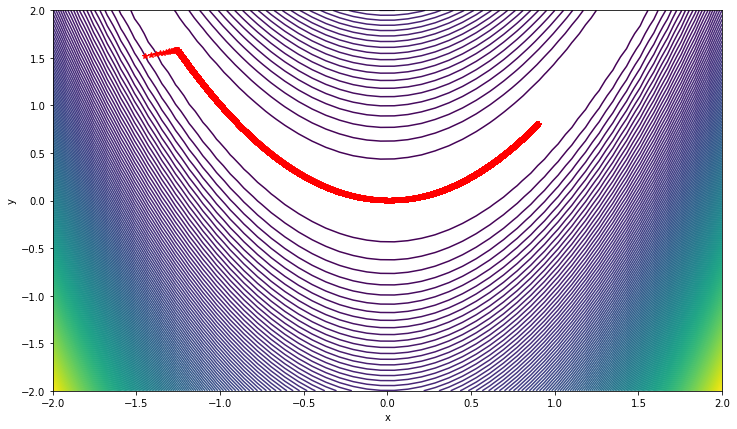

For step :  0
Loss is :  tensor(62.5000, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  2000
Loss is :  tensor(4.4581, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  4000
Loss is :  tensor(3.7572, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  6000
Loss is :  tensor(2.9649, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  8000
Loss is :  tensor(2.0181, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  10000
Loss is :  tensor(0.9650, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  12000
Loss is :  tensor(0.4508, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  14000
Loss is :  tensor(0.2661, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.90

In [16]:
#For alpha=0.1 (With NAG momentum)
x = torch.tensor([-1.5,1.5], requires_grad=True)
print("With NAG momentum, alpha=0.1")
optimizer4 = torch.optim.SGD([x],lr=0.0001,momentum=0.1,nesterov=True)
losslist,steplist,xval=optimise(x,optimizer4,0.01)
for i in steplist:
    if i%2000==0:
        print("For step : ",steplist[i])
        print("Loss is : ",losslist[i])
        print("Value of x is : ",xval[i])

With NAG momentum, alpha=0.5


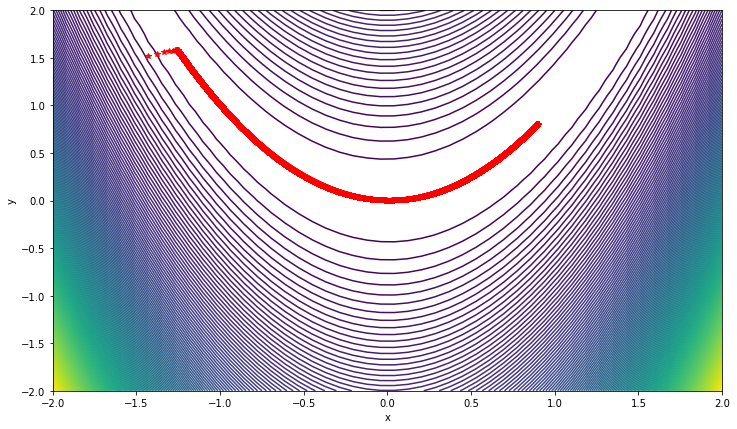

For step :  0
Loss is :  tensor(62.5000, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  2000
Loss is :  tensor(3.9003, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  4000
Loss is :  tensor(2.4170, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  6000
Loss is :  tensor(0.6845, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  8000
Loss is :  tensor(0.2428, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  10000
Loss is :  tensor(0.1236, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  12000
Loss is :  tensor(0.0715, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8097], requires_grad=True)
For step :  14000
Loss is :  tensor(0.0443, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.90

In [10]:
#For alpha=0.5 (With NAG momentum)
x = torch.tensor([-1.5,1.5], requires_grad=True)
print("With NAG momentum, alpha=0.5")
optimizer5 = torch.optim.SGD([x],lr=0.0001,momentum=0.5,nesterov=True)
losslist,steplist,xval=optimise(x,optimizer5,0.01)
for i in steplist:
    if i%2000==0:
        print("For step : ",steplist[i])
        print("Loss is : ",losslist[i])
        print("Value of x is : ",xval[i])


With NAG momentum, alpha=0.9


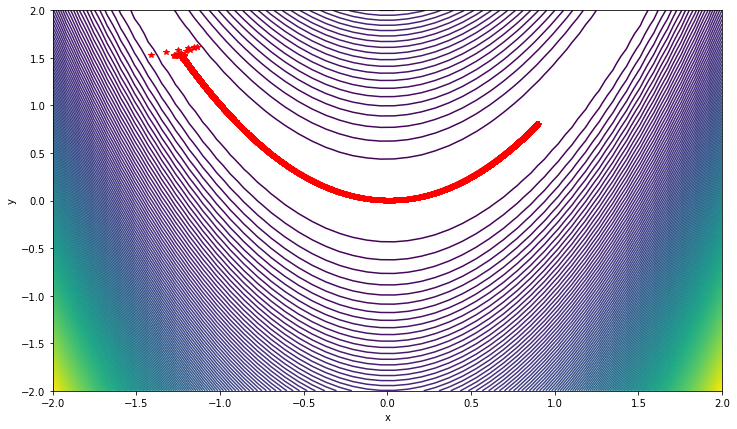

For step :  0
Loss is :  tensor(62.5000, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8098], requires_grad=True)
For step :  2000
Loss is :  tensor(0.1171, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8098], requires_grad=True)
For step :  4000
Loss is :  tensor(0.0122, grad_fn=<AddBackward0>)
Value of x is :  tensor([0.9001, 0.8098], requires_grad=True)


In [12]:
#For alpha=0.9 (With NAG momentum)
x = torch.tensor([-1.5,1.5], requires_grad=True)
print("With NAG momentum, alpha=0.9")
optimizer6 = torch.optim.SGD([x],lr=0.0001,momentum=0.9,nesterov=True)
losslist,steplist,xval=optimise(x,optimizer6,0.01)
for i in steplist:
    if i%2000==0:
        print("For step : ",steplist[i])
        print("Loss is : ",losslist[i])
        print("Value of x is : ",xval[i])
